In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from scipy import stats
import statsmodels.api as s

In [4]:
dataice=pd.read_excel("C:/Users/SHIVLEON/Downloads/icecream.xlsx")

In [5]:
dataice

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


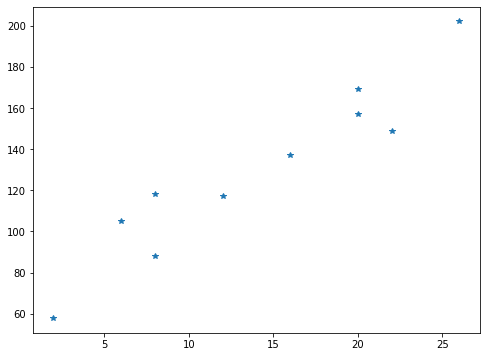

In [8]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(dataice["Student_Population"], dataice["Sales"],"*",label="dataice")

In [9]:
#lets make coef and constant value of LR
x=dataice["Student_Population"].values.reshape(-1,1)
y=dataice["Sales"].values.reshape(-1,1)

In [10]:
LR=LinearRegression()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
LR.coef_[0][0], LR.intercept_[0]

(5.0, 60.0)

In [13]:
# Lets go with OLS
St_pop=dataice["Student_Population"]
Sales=dataice["Sales"]
St_pop=s.add_constant(St_pop) #Adds a column of ones to an array
model=s.OLS(Sales,St_pop)
result=model.fit()
result.summary() #prints a summary representation of your model

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        18:06:31   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
dir(result)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [15]:
print(result.pvalues, result.t_test, result.f_test)

const                 0.000187
Student_Population    0.000025
dtype: float64 <bound method LikelihoodModelResults.t_test of <statsmodels.regression.linear_model.OLSResults object at 0x000001DC5FB14780>> <bound method LikelihoodModelResults.f_test of <statsmodels.regression.linear_model.OLSResults object at 0x000001DC5FB14780>>
